In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import missingno
#from datetime import datetime
import scipy.stats as stats
import plotly
import plotly.express as px
import matplotlib.pyplot as plt

Below we import data from a text file called 'Automobile.txt'. The text file is found in the Task folder

In [2]:
df = pd.read_csv("automobile.txt", delim_whitespace=True)
#The data was in one column and one row (basically it wasn't displaying normally) so we had to use the following code

In [3]:
#Get all the column names and assign them to a variable.
names= df.columns.str.split(',').tolist()

In [4]:
#Split all the values by ','
df= df.iloc[:,0].str.split(',', expand=True)

In [5]:
#Finally, assign 'names' to column names & show information of our dataset and that's it!
df.columns = names
df.info()
df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   (symboling,)          205 non-null    object
 1   (normalized-losses,)  205 non-null    object
 2   (make,)               205 non-null    object
 3   (fuel-type,)          205 non-null    object
 4   (aspiration,)         205 non-null    object
 5   (num-of-doors,)       205 non-null    object
 6   (body-style,)         205 non-null    object
 7   (drive-wheels,)       205 non-null    object
 8   (engine-location,)    205 non-null    object
 9   (wheel-base,)         205 non-null    object
 10  (length,)             205 non-null    object
 11  (width,)              205 non-null    object
 12  (height,)             205 non-null    object
 13  (curb-weight,)        205 non-null    object
 14  (engine-type,)        205 non-null    object
 15  (num-of-cylinders,)   205 non-null    ob

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.50,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.80,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.40,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.10,...,141,mpfi,3.78,3.15,9.50,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.10,...,141,mpfi,3.78,3.15,8.70,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.10,...,173,mpfi,3.58,2.87,8.80,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.10,...,145,idi,3.01,3.40,23.00,106,4800,26,27,22470


In [6]:
# Lets view the columns available to us in a horizontal list
df.columns

MultiIndex([(        'symboling',),
            ('normalized-losses',),
            (             'make',),
            (        'fuel-type',),
            (       'aspiration',),
            (     'num-of-doors',),
            (       'body-style',),
            (     'drive-wheels',),
            (  'engine-location',),
            (       'wheel-base',),
            (           'length',),
            (            'width',),
            (           'height',),
            (      'curb-weight',),
            (      'engine-type',),
            ( 'num-of-cylinders',),
            (      'engine-size',),
            (      'fuel-system',),
            (             'bore',),
            (           'stroke',),
            ('compression-ratio',),
            (       'horsepower',),
            (         'peak-rpm',),
            (         'city-mpg',),
            (      'highway-mpg',),
            (            'price',)],
           )

In [7]:
df = df.replace(',','', regex=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.50,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.80,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.40,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450


In [8]:
# We need to add an ID column for this dataframe 
df.insert(0, 'ID', range(201, 201 + len(df)))
df

,ID,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,201,3,?,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,202,3,?,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,203,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,204,2,164,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,205,2,164,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,401,-1,95,volvo,gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.50,114,5400,23,28,16845
201,402,-1,95,volvo,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.70,160,5300,19,25,19045
202,403,-1,95,volvo,gas,std,four,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.80,134,5500,18,23,21485
203,404,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,...,145,idi,3.01,3.40,23.00,106,4800,26,27,22470


# Data Cleaning

In [9]:
# We feel like we need to remove some of columns for our analysis to work effectiely
df = df.drop(['normalized-losses','aspiration', 'wheel-base', 'bore', 'fuel-system', 'stroke', 'compression-ratio', 'peak-rpm', 'city-mpg', 'highway-mpg'], axis=1)
df

c:\users\hellomotho\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,ID,symboling,make,fuel-type,num-of-doors,body-style,drive-wheels,engine-location,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,horsepower,price
0,201,3,alfa-romero,gas,two,convertible,rwd,front,168.80,64.10,48.80,2548,dohc,four,130,111,13495
1,202,3,alfa-romero,gas,two,convertible,rwd,front,168.80,64.10,48.80,2548,dohc,four,130,111,16500
2,203,1,alfa-romero,gas,two,hatchback,rwd,front,171.20,65.50,52.40,2823,ohcv,six,152,154,16500
3,204,2,audi,gas,four,sedan,fwd,front,176.60,66.20,54.30,2337,ohc,four,109,102,13950
4,205,2,audi,gas,four,sedan,4wd,front,176.60,66.40,54.30,2824,ohc,five,136,115,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,401,-1,volvo,gas,four,sedan,rwd,front,188.80,68.90,55.50,2952,ohc,four,141,114,16845
201,402,-1,volvo,gas,four,sedan,rwd,front,188.80,68.80,55.50,3049,ohc,four,141,160,19045
202,403,-1,volvo,gas,four,sedan,rwd,front,188.80,68.90,55.50,3012,ohcv,six,173,134,21485
203,404,-1,volvo,diesel,four,sedan,rwd,front,188.80,68.90,55.50,3217,ohc,six,145,106,22470


### The portion of code relevant for checking missing values is as follows.

In [10]:
if df.isnull().any(axis=None):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    print(df[df.isnull().any(axis=1)].head(3))
    missingno.matrix(df)
    plt.show()

### Code for checking duplicates

In [11]:
# generate count statistics of duplicate entries
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


In [12]:
#Checking if indeed there are no duplicates and drop them if any
df.drop_duplicates(inplace=True)

In [13]:
#let's see if we have row that have zero value or have not been recorded
# Create a temporary dataset
temp_df = df

# remove all the rows that contain a missing value.
temp_df.dropna().head()

,ID,symboling,make,fuel-type,num-of-doors,body-style,drive-wheels,engine-location,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,horsepower,price
0,201,3,alfa-romero,gas,two,convertible,rwd,front,168.80,64.10,48.80,2548,dohc,four,130,111,13495
1,202,3,alfa-romero,gas,two,convertible,rwd,front,168.80,64.10,48.80,2548,dohc,four,130,111,16500
2,203,1,alfa-romero,gas,two,hatchback,rwd,front,171.20,65.50,52.40,2823,ohcv,six,152,154,16500
3,204,2,audi,gas,four,sedan,fwd,front,176.60,66.20,54.30,2337,ohc,four,109,102,13950
4,205,2,audi,gas,four,sedan,4wd,front,176.60,66.40,54.30,2824,ohc,five,136,115,17450


It looks like all are recorded judging from the head () of the dataframe

### Now we can do the exploration of data

#### Identify relationships between variables / features

The main goal here is to identify and create relationships which can help us build ideas. We have defined questions which can help us identify some relationships to explore.

#### Which are the 5 most expensive cars by make?
#### How do the most expensive and cheapest cars compare? 
#### Exploring the most expensive cars help us explore if some cars are worth the money spent on them based on their performance and features.

## We would have loved to explore the above but due to so much to be done we will leave it as is, but please refer to the Capstone Project II.ipynb where the above mentioned is done.

In [14]:
# To find out the most expensive cars, we need to look at the price set 
df.sort_values(('price',))

,ID,symboling,make,fuel-type,num-of-doors,body-style,drive-wheels,engine-location,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,horsepower,price
147,348,0,subaru,gas,four,wagon,fwd,front,173.50,65.40,53.00,2455,ohcf,four,108,94,10198
62,263,0,mazda,gas,four,sedan,fwd,front,177.80,66.50,55.50,2410,ohc,four,122,84,10245
40,241,0,honda,gas,four,sedan,fwd,front,175.40,62.50,54.10,2372,ohc,four,110,86,10295
42,243,1,honda,gas,two,sedan,fwd,front,169.10,66.00,51.00,2293,ohc,four,110,100,10345
61,262,1,mazda,gas,two,hatchback,fwd,front,177.80,66.50,53.70,2385,ohc,four,122,84,10595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,389,2,volkswagen,gas,four,sedan,fwd,front,171.70,65.50,55.70,2300,ohc,four,109,100,9995
45,246,0,isuzu,gas,four,sedan,fwd,front,155.90,63.60,52.00,1909,ohc,four,90,70,?
44,245,1,isuzu,gas,two,sedan,fwd,front,155.90,63.60,52.00,1874,ohc,four,90,70,?
129,330,1,porsche,gas,two,hatchback,rwd,front,175.70,72.30,50.50,3366,dohcv,eight,203,288,?


In [15]:
df.sort_values(('price',), ascending=False)

,ID,symboling,make,fuel-type,num-of-doors,body-style,drive-wheels,engine-location,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,horsepower,price
44,245,1,isuzu,gas,two,sedan,fwd,front,155.90,63.60,52.00,1874,ohc,four,90,70,?
45,246,0,isuzu,gas,four,sedan,fwd,front,155.90,63.60,52.00,1909,ohc,four,90,70,?
129,330,1,porsche,gas,two,hatchback,rwd,front,175.70,72.30,50.50,3366,dohcv,eight,203,288,?
9,210,0,audi,gas,two,hatchback,4wd,front,178.20,67.90,52.00,3053,ohc,five,131,160,?
188,389,2,volkswagen,gas,four,sedan,fwd,front,171.70,65.50,55.70,2300,ohc,four,109,100,9995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,262,1,mazda,gas,two,hatchback,fwd,front,177.80,66.50,53.70,2385,ohc,four,122,84,10595
42,243,1,honda,gas,two,sedan,fwd,front,169.10,66.00,51.00,2293,ohc,four,110,100,10345
40,241,0,honda,gas,four,sedan,fwd,front,175.40,62.50,54.10,2372,ohc,four,110,86,10295
62,263,0,mazda,gas,four,sedan,fwd,front,177.80,66.50,55.50,2410,ohc,four,122,84,10245


In [16]:
# We checking what type of data is 'price' column
df.price.dtypes

price    object
dtype: object

In [17]:
#We droping the below rows with indexes [44,45,129,9] because they don't valid prices on the "price" column
df.drop([44,45,129,9], axis=0, inplace=True)
df
#df.drop(df.index[(df["price"] == "?")],axis=0,inplace=True)


,ID,symboling,make,fuel-type,num-of-doors,body-style,drive-wheels,engine-location,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,horsepower,price
0,201,3,alfa-romero,gas,two,convertible,rwd,front,168.80,64.10,48.80,2548,dohc,four,130,111,13495
1,202,3,alfa-romero,gas,two,convertible,rwd,front,168.80,64.10,48.80,2548,dohc,four,130,111,16500
2,203,1,alfa-romero,gas,two,hatchback,rwd,front,171.20,65.50,52.40,2823,ohcv,six,152,154,16500
3,204,2,audi,gas,four,sedan,fwd,front,176.60,66.20,54.30,2337,ohc,four,109,102,13950
4,205,2,audi,gas,four,sedan,4wd,front,176.60,66.40,54.30,2824,ohc,five,136,115,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,401,-1,volvo,gas,four,sedan,rwd,front,188.80,68.90,55.50,2952,ohc,four,141,114,16845
201,402,-1,volvo,gas,four,sedan,rwd,front,188.80,68.80,55.50,3049,ohc,four,141,160,19045
202,403,-1,volvo,gas,four,sedan,rwd,front,188.80,68.90,55.50,3012,ohcv,six,173,134,21485
203,404,-1,volvo,diesel,four,sedan,rwd,front,188.80,68.90,55.50,3217,ohc,six,145,106,22470


## Correlation

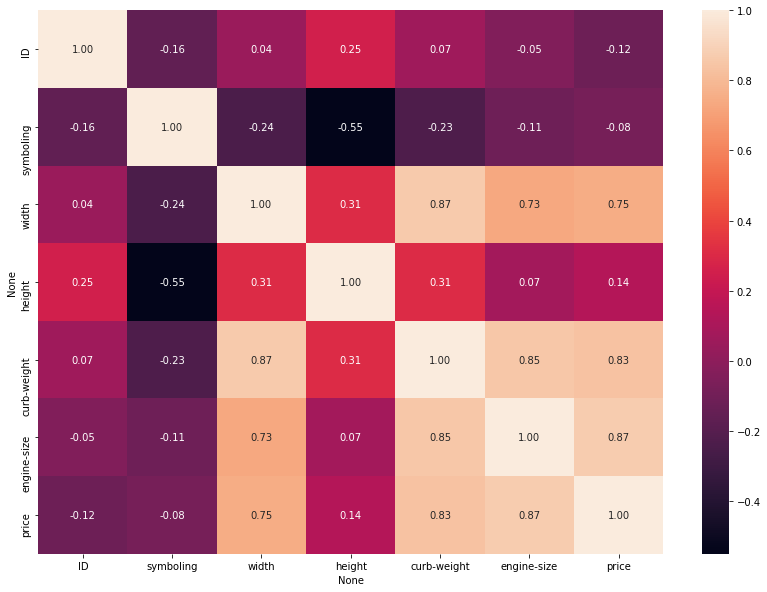

In [26]:
df[['height', 'symboling', 'width', 'engine-size', 'curb-weight', 'price']] = df[['height', 'symboling', 'width', 'engine-size', 'curb-weight', 'price']].apply(pd.to_numeric)
f,ax = plt.subplots(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax)
plt.show()

## Brands with the most number of cars in this dataset

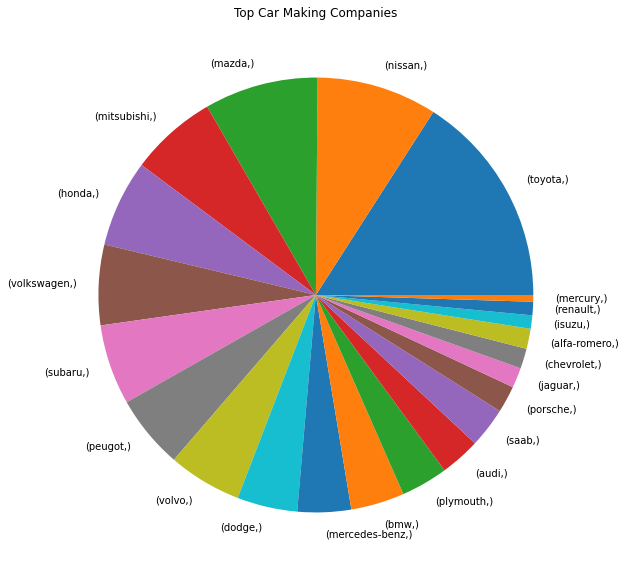

In [27]:
fig = plt.figure(figsize = (10,10))
ax = fig.subplots()
df.make.value_counts().plot(ax=ax, kind='pie')
ax.set_ylabel("")
ax.set_title("Top Car Making Companies")
plt.show()

Toyota has more car variants than any other company.
The Top 5 companies with more than car variants are Toyota, Nissan, Mazda, Mitsubishi, and Honda.

## Plot pairwise relationships

ValueError: could not broadcast input array from shape (201,1) into shape (201,)

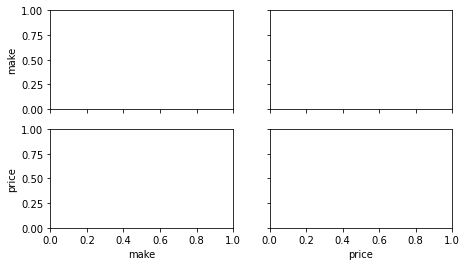

In [41]:
sns.pairplot(df,vars=[ 'make', 'price'], hue=
             'fuel-type',
             palette=sns.color_palette('magma'),diag_kind='kde',height=2, aspect=1.8);

## 3D graph of Horsepower, Price, and Fuel Tank

In [44]:
fig = px.scatter_3d(df, x='horsepower', z='price', y='fuel-type',color='make',width=800,height=750)
fig.update_layout(showlegend=True)
fig.show();

NameError: name 'px' is not defined